# Algorithm 4 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

1603 patches created with algorithm 4 loaded.
[22159.13291065 18657.78388916 10301.49505546  7905.57494048
  7500.79736815  6748.58210662  6001.92917997  5206.33883309
  4725.43835156  4548.61785712  4267.51117837  4059.09359569
  3909.18683051  3581.30668567  3487.58846961  3261.83806902
  3058.74984755  2816.80680167  2709.27945458  2562.77195805
  2345.13388032  2306.65276626  2227.63803358  2053.73605058
  1963.69681483  1910.27956353  1867.25452899  1762.45735779
  1684.72551632  1671.34460844  1610.77537645  1521.10274515
  1443.82223905  1372.99848006  1326.38763478  1263.8200154
  1254.8143727   1228.42573612  1201.69363387  1185.87034343
  1154.71918787  1139.05244526  1061.65979046  1031.17436881
  1013.24489219   967.07186935   958.96752097   927.74316822
   918.90257179   891.01034442   881.22224677   851.23551878
   841.1508213    822.9417134    788.60401714   779.55149156
   776.94936699   751.8462288    745.74136297   716.22391202
   699.91905141   674.13037071   655.710

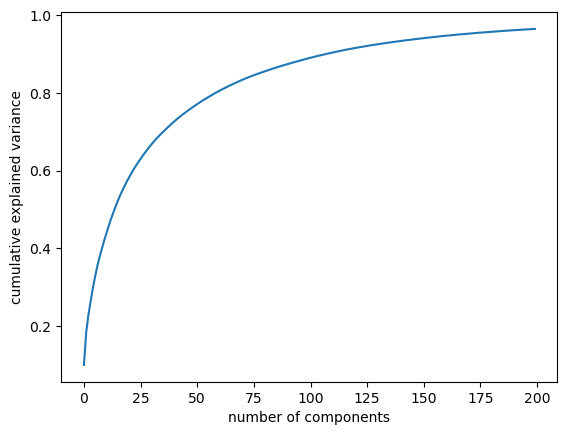

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra4.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav4.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 4 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)
# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
np.savetxt('mean4.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale4.csv',scaler.scale_, delimiter = ',') #stdev

#pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
#pca.fit(SampleFeatures)
#ReducedFeatures = pca.transform(SampleFeatures)
#print(pca.explained_variance_)
#print('reduced shape ', ReducedFeatures.shape)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance');

[22159.13291065 18657.78388916 10301.49505546  7905.57494048
  7500.79736815  6748.58210662  6001.92917997  5206.33883309
  4725.43835156  4548.61785712  4267.51117837  4059.09359569
  3909.18683051  3581.30668567  3487.58846961  3261.83806902
  3058.74984755  2816.80680167  2709.27945458  2562.77195805
  2345.13388032  2306.65276626  2227.63803358  2053.73605058
  1963.69681483  1910.27956354  1867.25452899  1762.45735779
  1684.72551632  1671.34460844  1610.77537646  1521.10274515
  1443.82223905  1372.99848006  1326.38763478  1263.82001541
  1254.81437271  1228.42573612  1201.69363388  1185.87034344
  1154.71918787  1139.05244527  1061.65979048  1031.17436884
  1013.24489221   967.0718694    958.96752101   927.74316829
   918.90257185   891.01034448   881.22224685   851.23551889
   841.15082138   822.9417136    788.60401726   779.55149172
   776.94936726   751.84622919   745.74136325   716.2239123
   699.91905199   674.13037141   655.71044896   653.78347552
   631.52981266   621.492

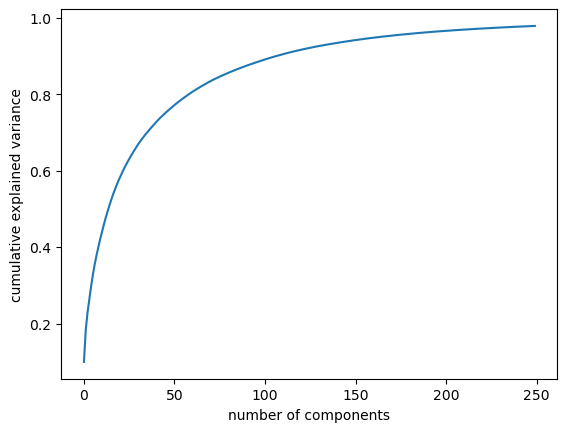

In [4]:
# Try again but with 250 components.
pca = PCA(n_components = 250) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [5]:
os.chdir('..')
os.chdir('./models/')

with open('pca4.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)